## 1-D Application

In [ ]:
import numpy as np
import scipy
from scipy import sparse
import matplotlib.pyplot as plt

import random

In [ ]:
def TVDMM(y,lam,Nit):
    y = np.c_[y]
    xold = np.zeros(y.size)
    cost = []
    N = len(y)
    Id = sparse.identity(N).toarray()
    D = Id[1:N,:] - Id[0:N-1,:]
    DDt = np.matmul(D,np.transpose(D))
    x = y
    Dx = np.matmul(D,x)
    Dy = np.matmul(D,y)
    for i in range(Nit):
        Empty = np.zeros((N-1,N-1))
        np.fill_diagonal(Empty,abs(Dx)/lam)
        F = Empty+DDt
        x = np.subtract(y,np.matmul(np.transpose(D),np.matmul(np.linalg.inv(F),Dy)))
        if np.linalg.norm(np.subtract(x,xold))/x.size<10e-6:
            break
        xold = x
        Dx = np.matmul(D,x)
        cost.append(.5*(sum(abs(np.square(np.subtract(x,y)))))+lam*sum(abs(Dx)))
    return (x,cost)

In [ ]:
def generatesignal(length,nsections,seed=5):
    # Seed random number generator
    np.random.seed(seed)
    boundaries = np.sort(np.random.uniform(0,length,nsections)).astype(int)
    signal = np.zeros(length)
    boundaries = np.unique(np.insert(boundaries,0,0))
    boundaries = np.unique(np.insert(boundaries,boundaries.size,boundaries.size-1))
    amplitudes = np.random.normal(0,1,boundaries.size-1)
    for i in np.arange(1,boundaries.size):
        signal[boundaries[i-1]:boundaries[i]] = amplitudes[i-1]
    return signal
    

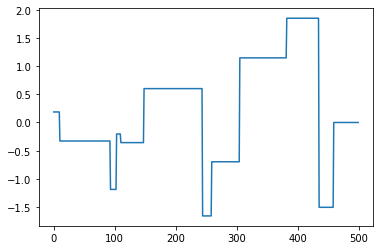

In [ ]:
signal = generatesignal(500,10)
noisesignal = signal+np.random.normal(0,.2,signal.shape)
plt.plot(signal)

Noisy signal compared to true signal

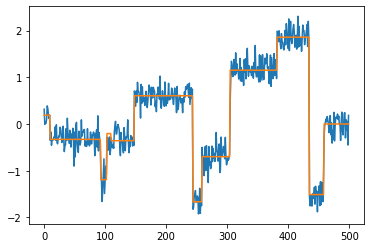

In [ ]:
plt.plot(noisesignal)
plt.plot(signal)

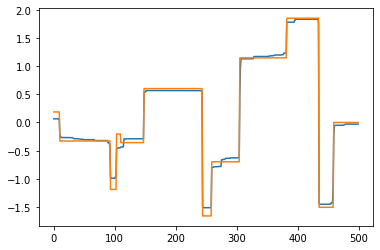

In [ ]:
tvdsignal,cost = TVDMM(noisesignal,1,100)
plt.plot(tvdsignal)
plt.plot(signal)

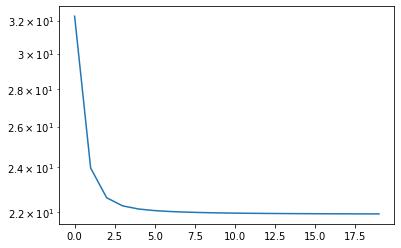

In [ ]:
plt.semilogy(cost)

In [ ]:
##### Provided Code
import numpy as np
import scipy
from scipy import sparse
import matplotlib.pyplot as plt

def generatesignal(length,nsections,seed=5):
    # Seed random number generator
    np.random.seed(seed)
    boundaries = np.sort(np.random.uniform(0,length,nsections)).astype(int)
    signal = np.zeros(length)
    boundaries = np.unique(np.insert(boundaries,0,0))
    boundaries = np.unique(np.insert(boundaries,boundaries.size,boundaries.size-1))
    amplitudes = np.random.normal(0,1,boundaries.size-1)
    for i in np.arange(1,boundaries.size):
        signal[boundaries[i-1]:boundaries[i]] = amplitudes[i-1]
    return signal

def TVDMM(y,lam,Nit):
    y = np.c_[y]
    xold = np.zeros(y.size)
    cost = []
    N = len(y)
    Id = sparse.identity(N).toarray()
    D = Id[1:N,:] - Id[0:N-1,:]
    DDt = np.matmul(D,np.transpose(D))
    x = y
    Dx = np.matmul(D,x)
    Dy = np.matmul(D,y)
    for i in range(Nit):
        Empty = np.zeros((N-1,N-1))
        np.fill_diagonal(Empty,abs(Dx)/lam)
        F = Empty+DDt
        x = np.subtract(y,np.matmul(np.transpose(D),np.matmul(np.linalg.inv(F),Dy)))
        if np.linalg.norm(np.subtract(x,xold))/x.size<10e-6:
            break
        xold = x
        Dx = np.matmul(D,x)
        cost.append(.5*(sum(abs(np.square(np.subtract(x,y)))))+lam*sum(abs(Dx)))
    return (x,cost)

#### A) Use the provided code to generate and plot the generated signal, with noise, and the recovered signal from TVD using default values and lambda of 0.5.

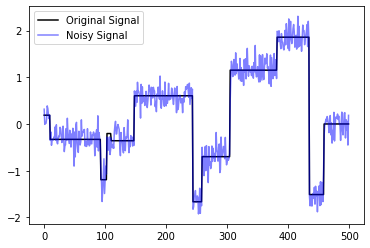

In [ ]:
#hint: use np.random.normal(0,.2,signal.shape) as the effects from noise

signal = generatesignal(500,10)

# complete the code below:
noisesignal = signal+np.random.normal(0,.2,signal.shape)
# end of modification

plt.plot(signal,c= 'k',label = 'Original Signal')
plt.plot(noisesignal,alpha = .5,c = 'b', label = 'Noisy Signal')
plt.legend()

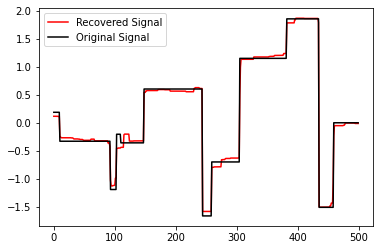

In [ ]:
# hint: Use the function [tvdsignal,cost]=TVDMM(signal,lambda,Number of iterations) to generate 
#       the recovered TVD using default values and lambda of 0.5.

# complete the code below:
tvdsignal,cost =  TVDMM(noisesignal,.5,100)
# end of modification

plt.plot(tvdsignal,c = 'r',label = 'Recovered Signal')
plt.plot(signal,c= 'k', label = 'Original Signal')
plt.legend()

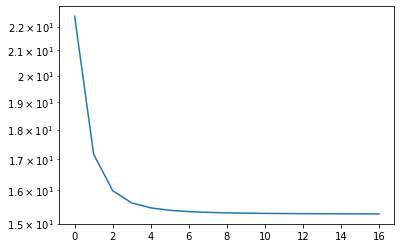

In [ ]:
plt.semilogy(cost)

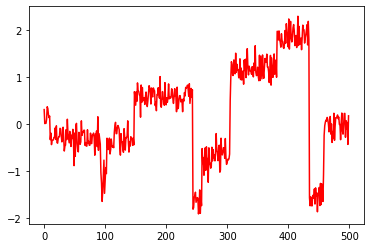

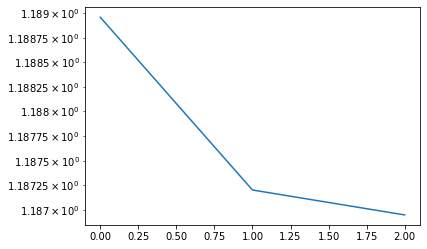

In [ ]:
# lambda = 0.01

tvdsignal,cost = TVDMM(noisesignal,.01,100)
plt.plot(tvdsignal,c = 'r',label = 'lambda = .01')
plt.show()
plt.semilogy(cost)


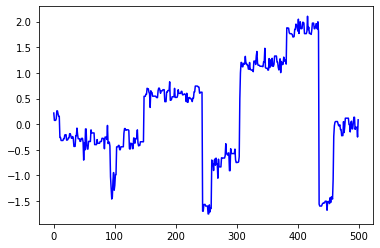

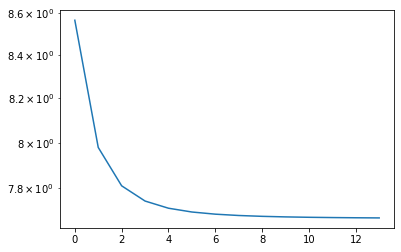

In [ ]:
# lambda = 0.1

tvdsignal,cost = TVDMM(noisesignal,.1,100)
plt.plot(tvdsignal,c = 'b',label = 'lambda = .1')
plt.show()
plt.semilogy(cost)



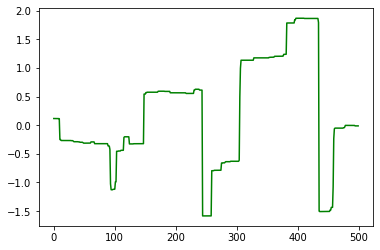

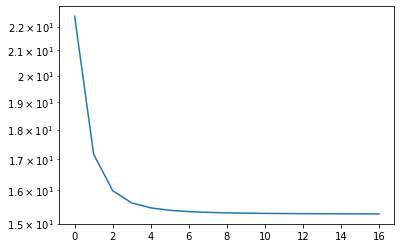

In [ ]:
# lambda = 0.5

tvdsignal,cost = TVDMM(noisesignal,.5,100)
plt.plot(tvdsignal,c = 'g',label = 'lambda = .5')
plt.show()
plt.semilogy(cost)

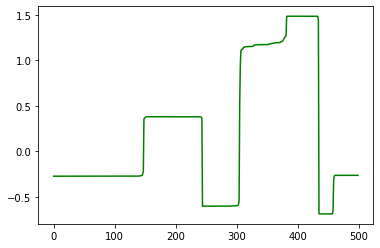

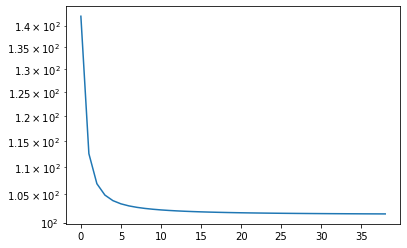

In [ ]:
# lambda = 10

tvdsignal,cost = TVDMM(noisesignal,10,100)
plt.plot(tvdsignal,c = 'g',label = 'lambda = .5')
plt.show()
plt.semilogy(cost)

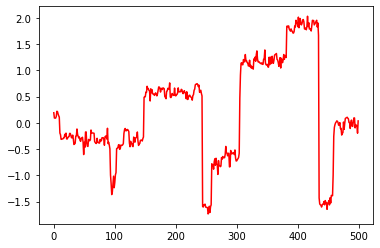

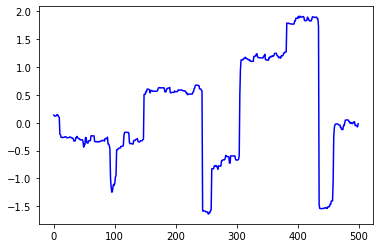

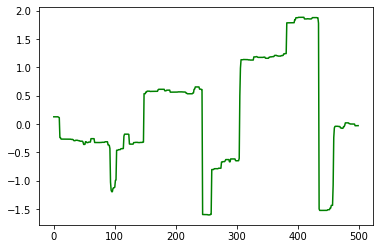

In [ ]:
tvdsignal,cost = TVDMM(noisesignal,.4,1)
plt.plot(tvdsignal,c = 'r',label = 'lambda = .01')
plt.show()

tvdsignal,cost = TVDMM(noisesignal,.4,3)
plt.plot(tvdsignal,c = 'b',label = 'lambda = .1')
plt.show()

tvdsignal,cost = TVDMM(noisesignal,.4,8)
plt.plot(tvdsignal,c = 'g',label = 'lambda = .5')
plt.show()